## **LGMVIP Task 1**

### *Level : Beginner Level Task*

### *Task : Iris Flowers Classification ML Project*

### *Author : Rupsha Chatterjee*

### *Dataset : http://archive.ics.uci.edu/ml/datasets/Iris*

### **Importing libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

### **Loading dataset**

In [2]:
iris = sns.load_dataset("iris")

In [3]:
#print the first five rows 
iris.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### **Understanding the data**

In [4]:
#print the number of rows and columns
iris.shape 

(150, 5)

In [5]:
#check what are the columns present
iris.columns 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
#check the datatypes of each columns
iris.dtypes 

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
#print the summary of dataframe
iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#show the general statistics of the dataset
iris.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#check for the presence of null values
iris.isnull().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

As we can see there are no null values.

In [10]:
#count the number of species of each kind
iris["species"].value_counts() 

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

### **Visualizing the data**

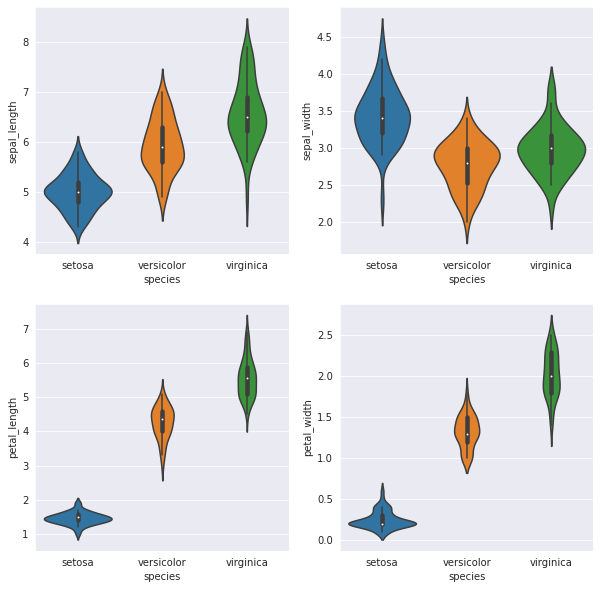

In [11]:
#visualizing how each of the species vary with each of the measures 
sns.set_style('darkgrid')
f,axes=plt.subplots(2,2,figsize=(10,10))
k1=sns.violinplot(x="species", y="sepal_length", data=iris, ax=axes[0,0])
k2=sns.violinplot(x="species", y="sepal_width", data=iris, ax=axes[0,1])
k3=sns.violinplot(x="species", y="petal_length", data=iris, ax=axes[1,0])
k4=sns.violinplot(x="species", y="petal_width", data=iris, ax=axes[1,1])
plt.show()

From the above graphs, we can see that iris setosa has the least petal length and petal width among all.

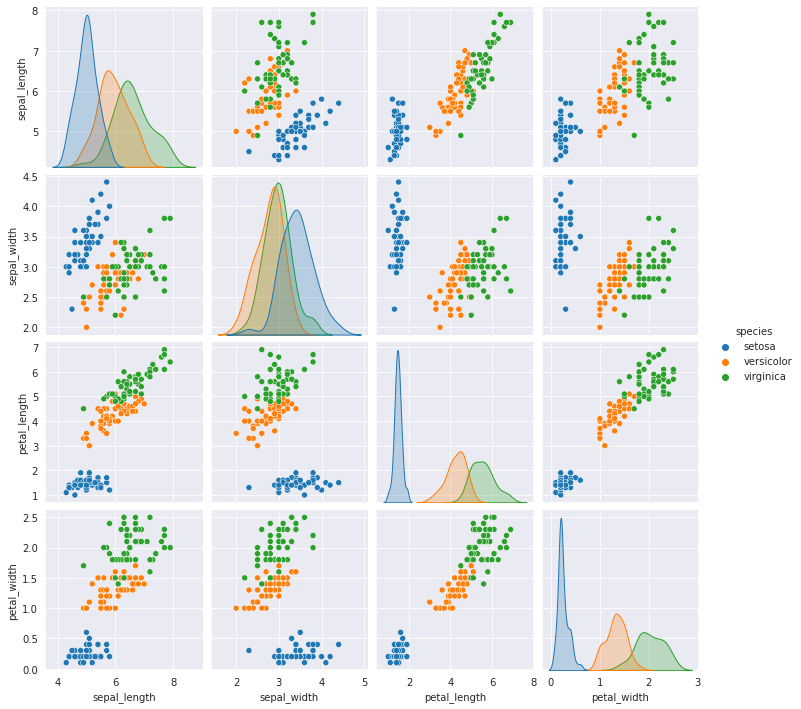

In [12]:
#visualizing multiple pairwise bivariate distributions
sns.pairplot(iris,hue="species")

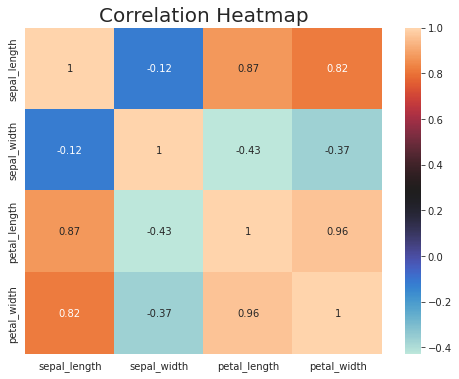

In [13]:
#visualizing the correlation between the measures
corr=iris.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='icefire', annot=True)
plt.title('Correlation Heatmap',fontsize=20)
plt.show()

Correlation ranges from -1 to 1. Values closer to zero means there is no linear relationship between them, those close to 1 means they are positively related, i.e., if one increases the other also increases and vice versa and those close to -1 means they are negatively related, i.e., if one increases the other decreases and vice versa.

### **Dividing dataset for train test split**

In [14]:
x = iris.drop(["species"], axis = 1)
y = iris["species"]
print("x.shape = ", x.shape)
print("y.shape = ", y.shape)

x.shape =  (150, 4)
y.shape =  (150,)


As we can see x contains 150 rows and 4 columns and y contains 150 rows and 1 column.

### **Train test split**

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,  random_state = 1)

In [16]:
print("X_train = ", X_train.shape)
print("X_test = ", X_test.shape)
print("y_train = ", y_train.shape)
print("y_test = ", y_test.shape)

X_train =  (105, 4)
X_test =  (45, 4)
y_train =  (105,)
y_test =  (45,)


After splitting, X_train has 105 rows and 4 columns, X_test has 45 rows and 4 columns, y_train has 105 rows and 1 column and y_test has 45 rows and 1 column.

### **Model training**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### **Model testing**

In [18]:
pred = model.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, pred))

Accuracy =  0.9777777777777777


We can see the accuracy of this model is 98%.

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.95      1.00      0.97        18
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [20]:
cm=confusion_matrix(y_test, pred)
print(cm)

[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]
